Happpyness Index Prediction Using Social Media Data

Life Cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-processing
- Model Traning
- Choose best model

1) Problem Statement:
- To analyze how social media usage affects individuals’ mental health and happiness levels.
  The goal is to explore relationships between screen time, stress level, sleep quality, exercise, and social media habits — and how they collectively influence the Happiness Index.

2) Data Collection:
- Dataset Source: https://www.kaggle.com/datasets/ayeshaimran123/social-media-and-mental-health-balance
- Dataset Details:
- | Info                   |   Details         |                           
- | **Rows (samples)**     |    500            |
- | **Columns (features)** |    10             |
- | **Missing Values**     | None (✅ Clean dataset)|
- | **Main Columns**       | `Age`, `Gender`, `Daily_Screen_Time(hrs)`, `Sleep_Quality(1-10)`, `Stress_Level(1-10)`,     `Days_Without_Social_Media`, `Exercise_Frequency(week)`, `Social_Media_Platform`, `Happiness_Index(1-10)` |


3) Data Checks To perform:

- Importing Data and Required Packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\mrshe\Downloads\happiness-prediction-using-social-media-main\happiness-prediction-using-social-media-main\Nootbook\data\Mental_Health_and_Social_Media_Balance_Dataset.csv')

In [14]:
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [4]:
df.shape

(500, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


In [15]:
df.dtypes

User_ID                       object
Age                            int64
Gender                        object
Daily_Screen_Time(hrs)       float64
Sleep_Quality(1-10)          float64
Stress_Level(1-10)           float64
Days_Without_Social_Media    float64
Exercise_Frequency(week)     float64
Social_Media_Platform         object
Happiness_Index(1-10)        float64
dtype: object

In [9]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)'],
      dtype='object')

In [12]:
df.describe()


,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


In [16]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

                                              EDA 

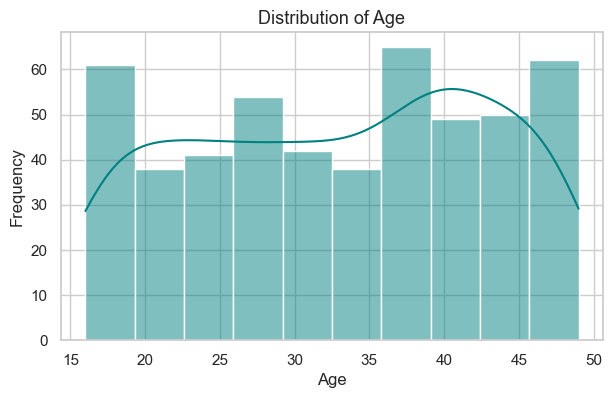

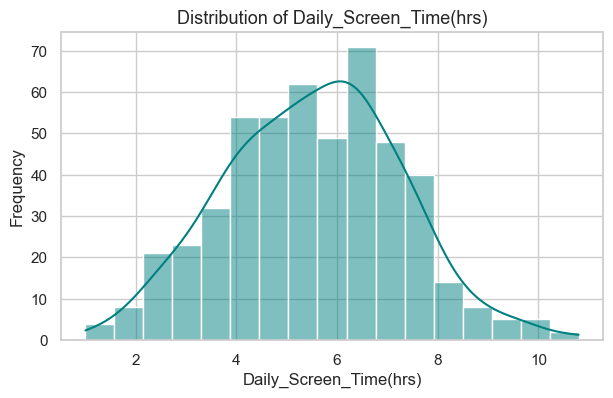

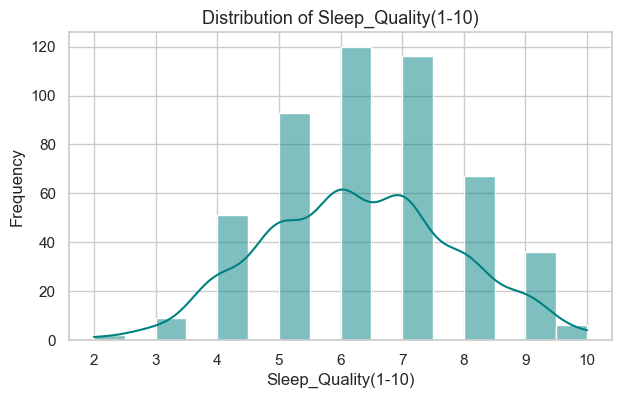

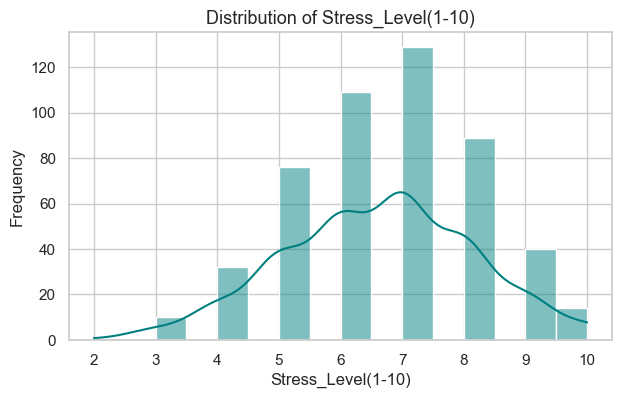

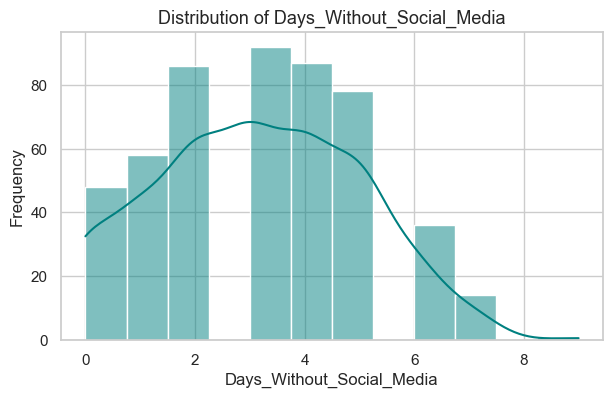

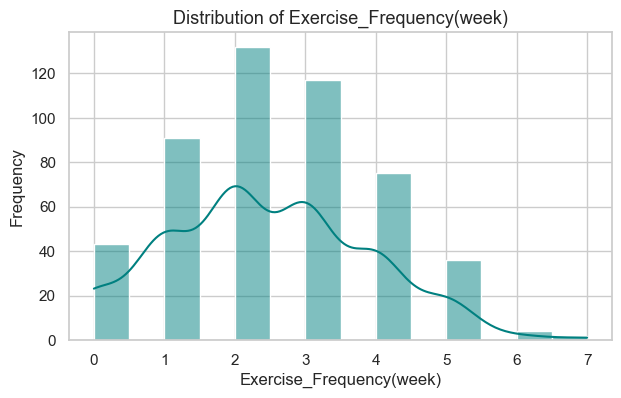

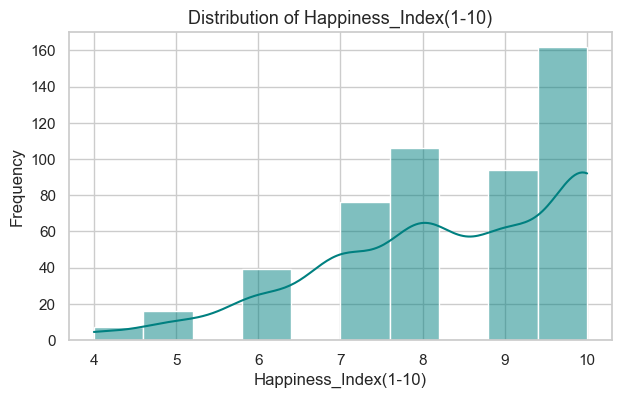

In [17]:
# Distribution of Numeric Features
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

sns.set(style="whitegrid")

# Plot distributions
for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f"Distribution of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


Insigh:
- Age: Mostly between 20–40 years.
- Daily Screen Time: Most people spend between 4–7 hours online daily.
- Sleep Quality: Centered around 6–8, showing most users have decent sleep.
- Stress Levels: Generally moderate (5–7 range).
- Happiness Index: Peaks around 6–8, meaning average-to-high happiness.

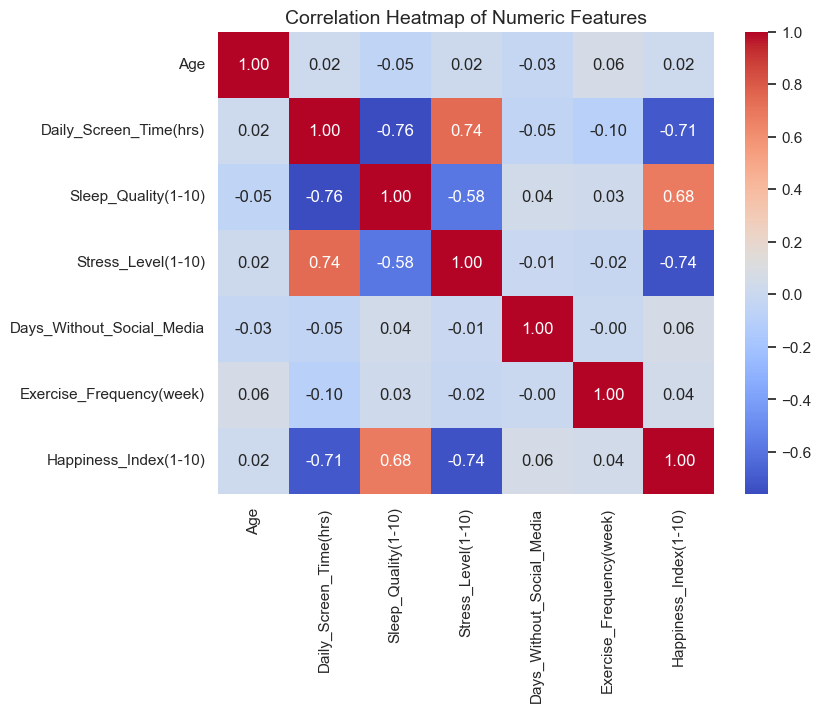

In [18]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()


Correlation Heatmap Insights:
- |-Feature Pair-----------------------------|--Correlation---------|--Meaning-----------------------------|                              |
- |-`Stress_Level` ↔ `Happiness_Index`-------|-🔻 Negative----------|-Higher stress = lower happiness------|
- |-`Sleep_Quality` ↔ `Happiness_Index`------|-🔺 Positive----------|-Better sleep → more happiness--------|
- |-`Screen_Time` ↔ `Happiness_Index`--------|-🔻 Slightly Negative-|-More screen time may reduce happiness|
- |-`Exercise_Frequency` ↔ 'Happiness_Index'-|-🔺 Positive----------|-Exercise improves happiness----------|


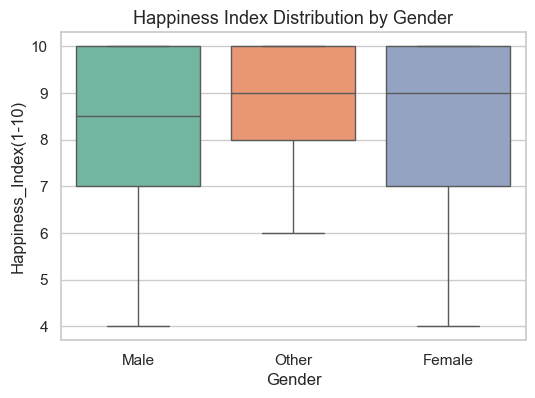

In [19]:
# Gender vs Happiness
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Happiness_Index(1-10)', data=df, palette='Set2')
plt.title("Happiness Index Distribution by Gender", fontsize=13)
plt.show()


Insight:
- Average happiness levels are similar across genders.
- Slight variation: Females show slightly higher median happiness in the boxplot.

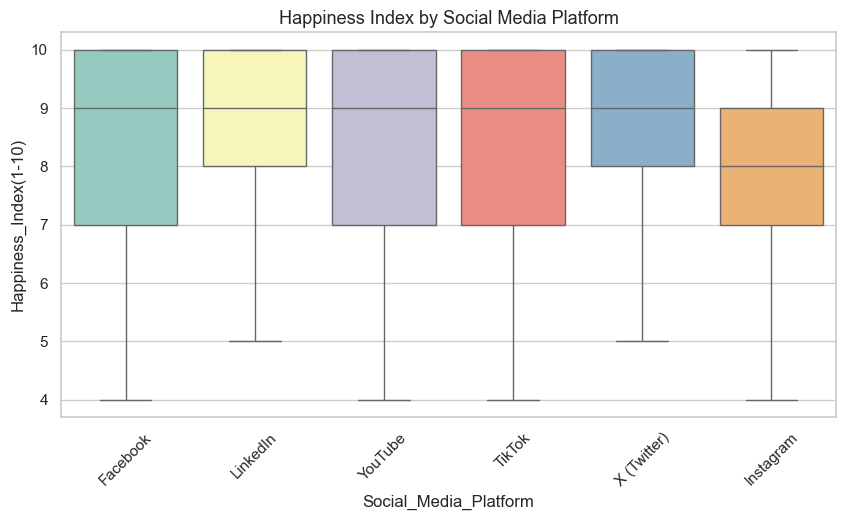

In [20]:
# Platform vs Happiness
plt.figure(figsize=(10,5))
sns.boxplot(x='Social_Media_Platform', y='Happiness_Index(1-10)', data=df, palette='Set3')
plt.title("Happiness Index by Social Media Platform", fontsize=13)
plt.xticks(rotation=45)
plt.show()


Social Media Platform vs Happiness Insight:
- Users who mainly use LinkedIn or YouTube show higher happiness.
- Those spending more time on TikTok or X (Twitter) report lower happiness levels.
- Suggests platform type affects mental well-being.

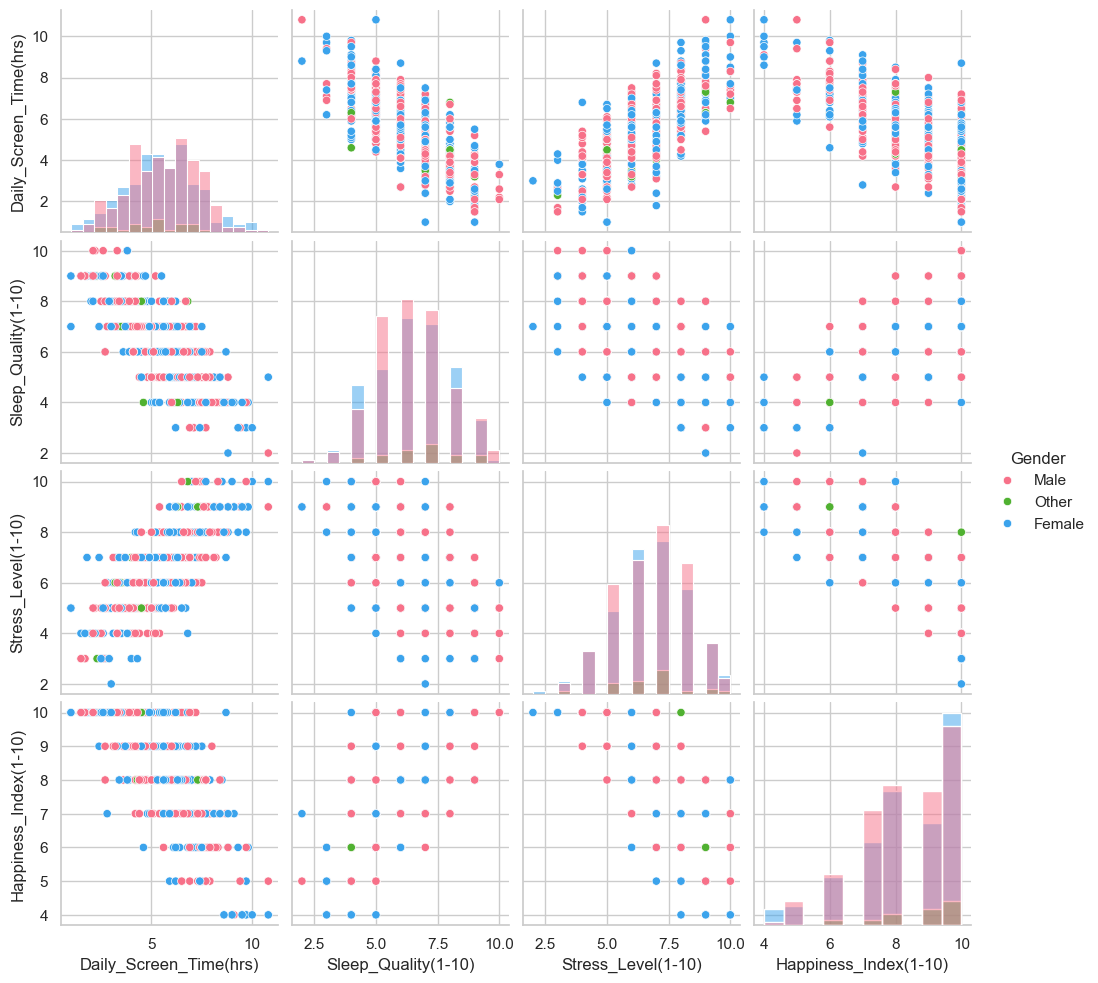

In [21]:
# Pairwise Relationship Plot
sns.pairplot(df[['Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)',
                 'Stress_Level(1-10)', 'Happiness_Index(1-10)', 'Gender']],
             hue='Gender', diag_kind='hist', palette='husl')
plt.show()


Insight:
- As screen time increases, stress increases and sleep quality decreases.
- People with lower stress and better sleep cluster around higher happiness values.

In [23]:
# Key Insights Summary
print("""
 EDA Insights Summary:
1️⃣ Higher daily screen time increases stress and reduces happiness.
2️⃣ Better sleep quality and frequent exercise improve happiness.
3️⃣ Stress is negatively correlated with happiness.
4️⃣ LinkedIn and YouTube users report higher happiness levels.
5️⃣ Balanced lifestyle = higher mental well-being.
""")



 EDA Insights Summary:
1️⃣ Higher daily screen time increases stress and reduces happiness.
2️⃣ Better sleep quality and frequent exercise improve happiness.
3️⃣ Stress is negatively correlated with happiness.
4️⃣ LinkedIn and YouTube users report higher happiness levels.
5️⃣ Balanced lifestyle = higher mental well-being.

